# Supervised Machine Learning Models - Classification - Stored grain state Predictions

In [1]:
# project details: # https://www.kaggle.com/competitions/spaceship-titanic/overview   (DELETE)

In [2]:
# Load the grain data

# import os
# from IPython.display import Image
# PATH = "C:\\Users\\pitsi\\Desktop\\Python Tutorials\\2022 Python Tutorial\\3. Classification Model\\"
# Image(filename = PATH + "Spaceship Tit pic.png", width=900, height=900)

## Table of Contents:

Video 1:
1. What is ML in a nutshell
2. What is the ML Process we will follow
3. Loading & Investigating the raw data
4. Data Cleaning
5. Visualizing the Data
6. Missing Values
7. Investigating distributions
8. Scalling the data & Turning categorical values to Numeric Representation
9. Selecting the important features
10. Training & Running the classification model
    
Video 2    
1. Model Optimization
2. Trying a new way of replacing missing values
3. Trying with less variables - Avoid overfit
4. Trying the Recursive Feature Elimination Process
5. Running our Final Model
6. Saving the combine results in a single CSV File - For Power BI Dashboard
    
Video 3:
 - Power BI Dashboard

## 1. What is Machine Learning (ML) in a nutshell
- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)
- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions
- ML is a subset of Artificial Intelligence

## 2. The Machine Learning Process

In [3]:
# PATH = "C:\\Users\\pitsi\Desktop\\Python tutorials\\2022 Python Tutorial\\2. Linear Regression\\"
# Image(filename = PATH + "ML Process.png", width=900, height=900)



In [4]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split

# To change scientific numbers to float (doesnt deal with the model)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings   
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

## 3. Loading & Investigating the raw data

In [5]:
# loading the raw data

# raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
# evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
# submission_example = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//sample_submission.csv")

raw_data = pd.read_excel("U:\\Python Practice File\\machine_learning\\Bin5_ML_Year1_18May24.xlsx")
raw_data
print('raw_data', raw_data.shape)
# print('evaluation_data', evaluation_data.shape)
# print('submission_example', submission_example.shape)



raw_data (291, 18)


In [6]:
raw_data.head()

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0      72.126667   14.929250     66.966667   66.361667       57.211200   
1      72.590833   14.974917     67.409167   74.795417       60.274874   
2      79.719298   16.790167     39.450833   83.077500       48.253696   
3      73.570000   15.604583     38.290000   73.415417       28.839312   
4      76.159355   15.651130     36.997917   76.479167       30.400642   

   Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2    Temp_C1  \
0     74.633400     537.000000    59.633700  74.084000  531.000000  62.656667   
1     72.263439     535.391304    63.152558  78.816875  524.166667  62.351667   
2     77.125446     510.000000    58.244643  81.005930  518.869565  47.068772   
3     80.843108     518.916667    48.137579  72.820833  550.041667  43.173333   
4     75.755637     523.541667    47.354100  67.959329  545.375000  41.533548   

     Temp_C2    Temp_C3    Temp_C4    Temp_C5  Average_Grain_Temp Season  \
0  62.083333  64.178125  62.567500  62.205833           62.738292   Fall   
1  62.620000  64.181250  62.609167  62.252500           62.802917   Fall   
2  46.667018  46.510965  47.249474  46.206316           46.740509   Fall   
3  40.950000  42.478125  43.771667  42.185000           42.511625   Fall   
4  39.767097  40.683065  42.313548  40.587097           40.976871   Fall   

  Grain_state  
0     Initial  
1     Initial  
2     Initial  
3     Initial  
4     Initial

In [7]:
# Checking for null values

raw_data.isnull().sum()

Grain_Bulk_RH         0
EMC_Center            0
Ambient_Temp          0
Ambient_RH            0
Headspace_Temp        0
Headspace_RH          0
Headspace_CO2         0
Plenum_Temp           0
Plenum_RH             0
Plenum_CO2            0
Temp_C1               0
Temp_C2               0
Temp_C3               0
Temp_C4               0
Temp_C5               0
Average_Grain_Temp    0
Season                0
Grain_state           0
dtype: int64

In [8]:
# Vizualizing the dtypes
raw_data.dtypes

Grain_Bulk_RH         float64
EMC_Center            float64
Ambient_Temp          float64
Ambient_RH            float64
Headspace_Temp        float64
Headspace_RH          float64
Headspace_CO2         float64
Plenum_Temp           float64
Plenum_RH             float64
Plenum_CO2            float64
Temp_C1               float64
Temp_C2               float64
Temp_C3               float64
Temp_C4               float64
Temp_C5               float64
Average_Grain_Temp    float64
Season                 object
Grain_state            object
dtype: object

In [9]:
# changing the types so we can visualize

strings = ['Season', 'Grain_state']
numeric = [ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']

for s in strings:
    raw_data[s] = raw_data[s].astype(str)
    
for n in numeric:
    #raw_data[n][raw_data[n] == 'Unknown'] = 0
    raw_data[n] = raw_data[n].astype(float)

In [10]:
raw_data.head()

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0      72.126667   14.929250     66.966667   66.361667       57.211200   
1      72.590833   14.974917     67.409167   74.795417       60.274874   
2      79.719298   16.790167     39.450833   83.077500       48.253696   
3      73.570000   15.604583     38.290000   73.415417       28.839312   
4      76.159355   15.651130     36.997917   76.479167       30.400642   

   Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2    Temp_C1  \
0     74.633400     537.000000    59.633700  74.084000  531.000000  62.656667   
1     72.263439     535.391304    63.152558  78.816875  524.166667  62.351667   
2     77.125446     510.000000    58.244643  81.005930  518.869565  47.068772   
3     80.843108     518.916667    48.137579  72.820833  550.041667  43.173333   
4     75.755637     523.541667    47.354100  67.959329  545.375000  41.533548   

     Temp_C2    Temp_C3    Temp_C4    Temp_C5  Average_Grain_Temp Season  \
0  62.083333  64.178125  62.567500  62.205833           62.738292   Fall   
1  62.620000  64.181250  62.609167  62.252500           62.802917   Fall   
2  46.667018  46.510965  47.249474  46.206316           46.740509   Fall   
3  40.950000  42.478125  43.771667  42.185000           42.511625   Fall   
4  39.767097  40.683065  42.313548  40.587097           40.976871   Fall   

  Grain_state  
0     Initial  
1     Initial  
2     Initial  
3     Initial  
4     Initial

In [11]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Grain_Bulk_RH :288
The number of values for feature EMC_Center :289
The number of values for feature Ambient_Temp :288
The number of values for feature Ambient_RH :289
The number of values for feature Headspace_Temp :290
The number of values for feature Headspace_RH :290
The number of values for feature Headspace_CO2 :286
The number of values for feature Plenum_Temp :290
The number of values for feature Plenum_RH :290
The number of values for feature Plenum_CO2 :284
The number of values for feature Temp_C1 :289
The number of values for feature Temp_C2 :289
The number of values for feature Temp_C3 :289
The number of values for feature Temp_C4 :289
The number of values for feature Temp_C5 :289
The number of values for feature Average_Grain_Temp :289
The number of values for feature Season :4 -- ['Fall' 'Spring' 'Summer' 'Winter']
The number of values for feature Grain_state :5 -- ['Above-moderate' 'Initial' 'Mid_moderate' 'Minimal' 'Moderate']


## 4. Data Cleaning

In [12]:
# raw_data['Cabin'].unique()

In [13]:
# investigating Cabin
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# pd.set_option("display.max_rows", None)

# raw_data['Cabin'].unique()
# raw_data['Cabin'].value_counts()

In [14]:
# cleaning the Cabin

# # creating a copy file
# raw_data_clean = raw_data.copy()

# # adding 3 more columns
# raw_data_clean[['Deck', 'Num', 'Side']] = raw_data_clean['Cabin'].str.split('/', expand=True) 

# del raw_data_clean['Cabin']

# raw_data_clean.head()

In [15]:
# investigating the new features
#raw_data_clean['Age'].value_counts()
#raw_data_clean[['Age']].sort_values(by = 'Age').drop_duplicates()

## 5. Visualizing the Data

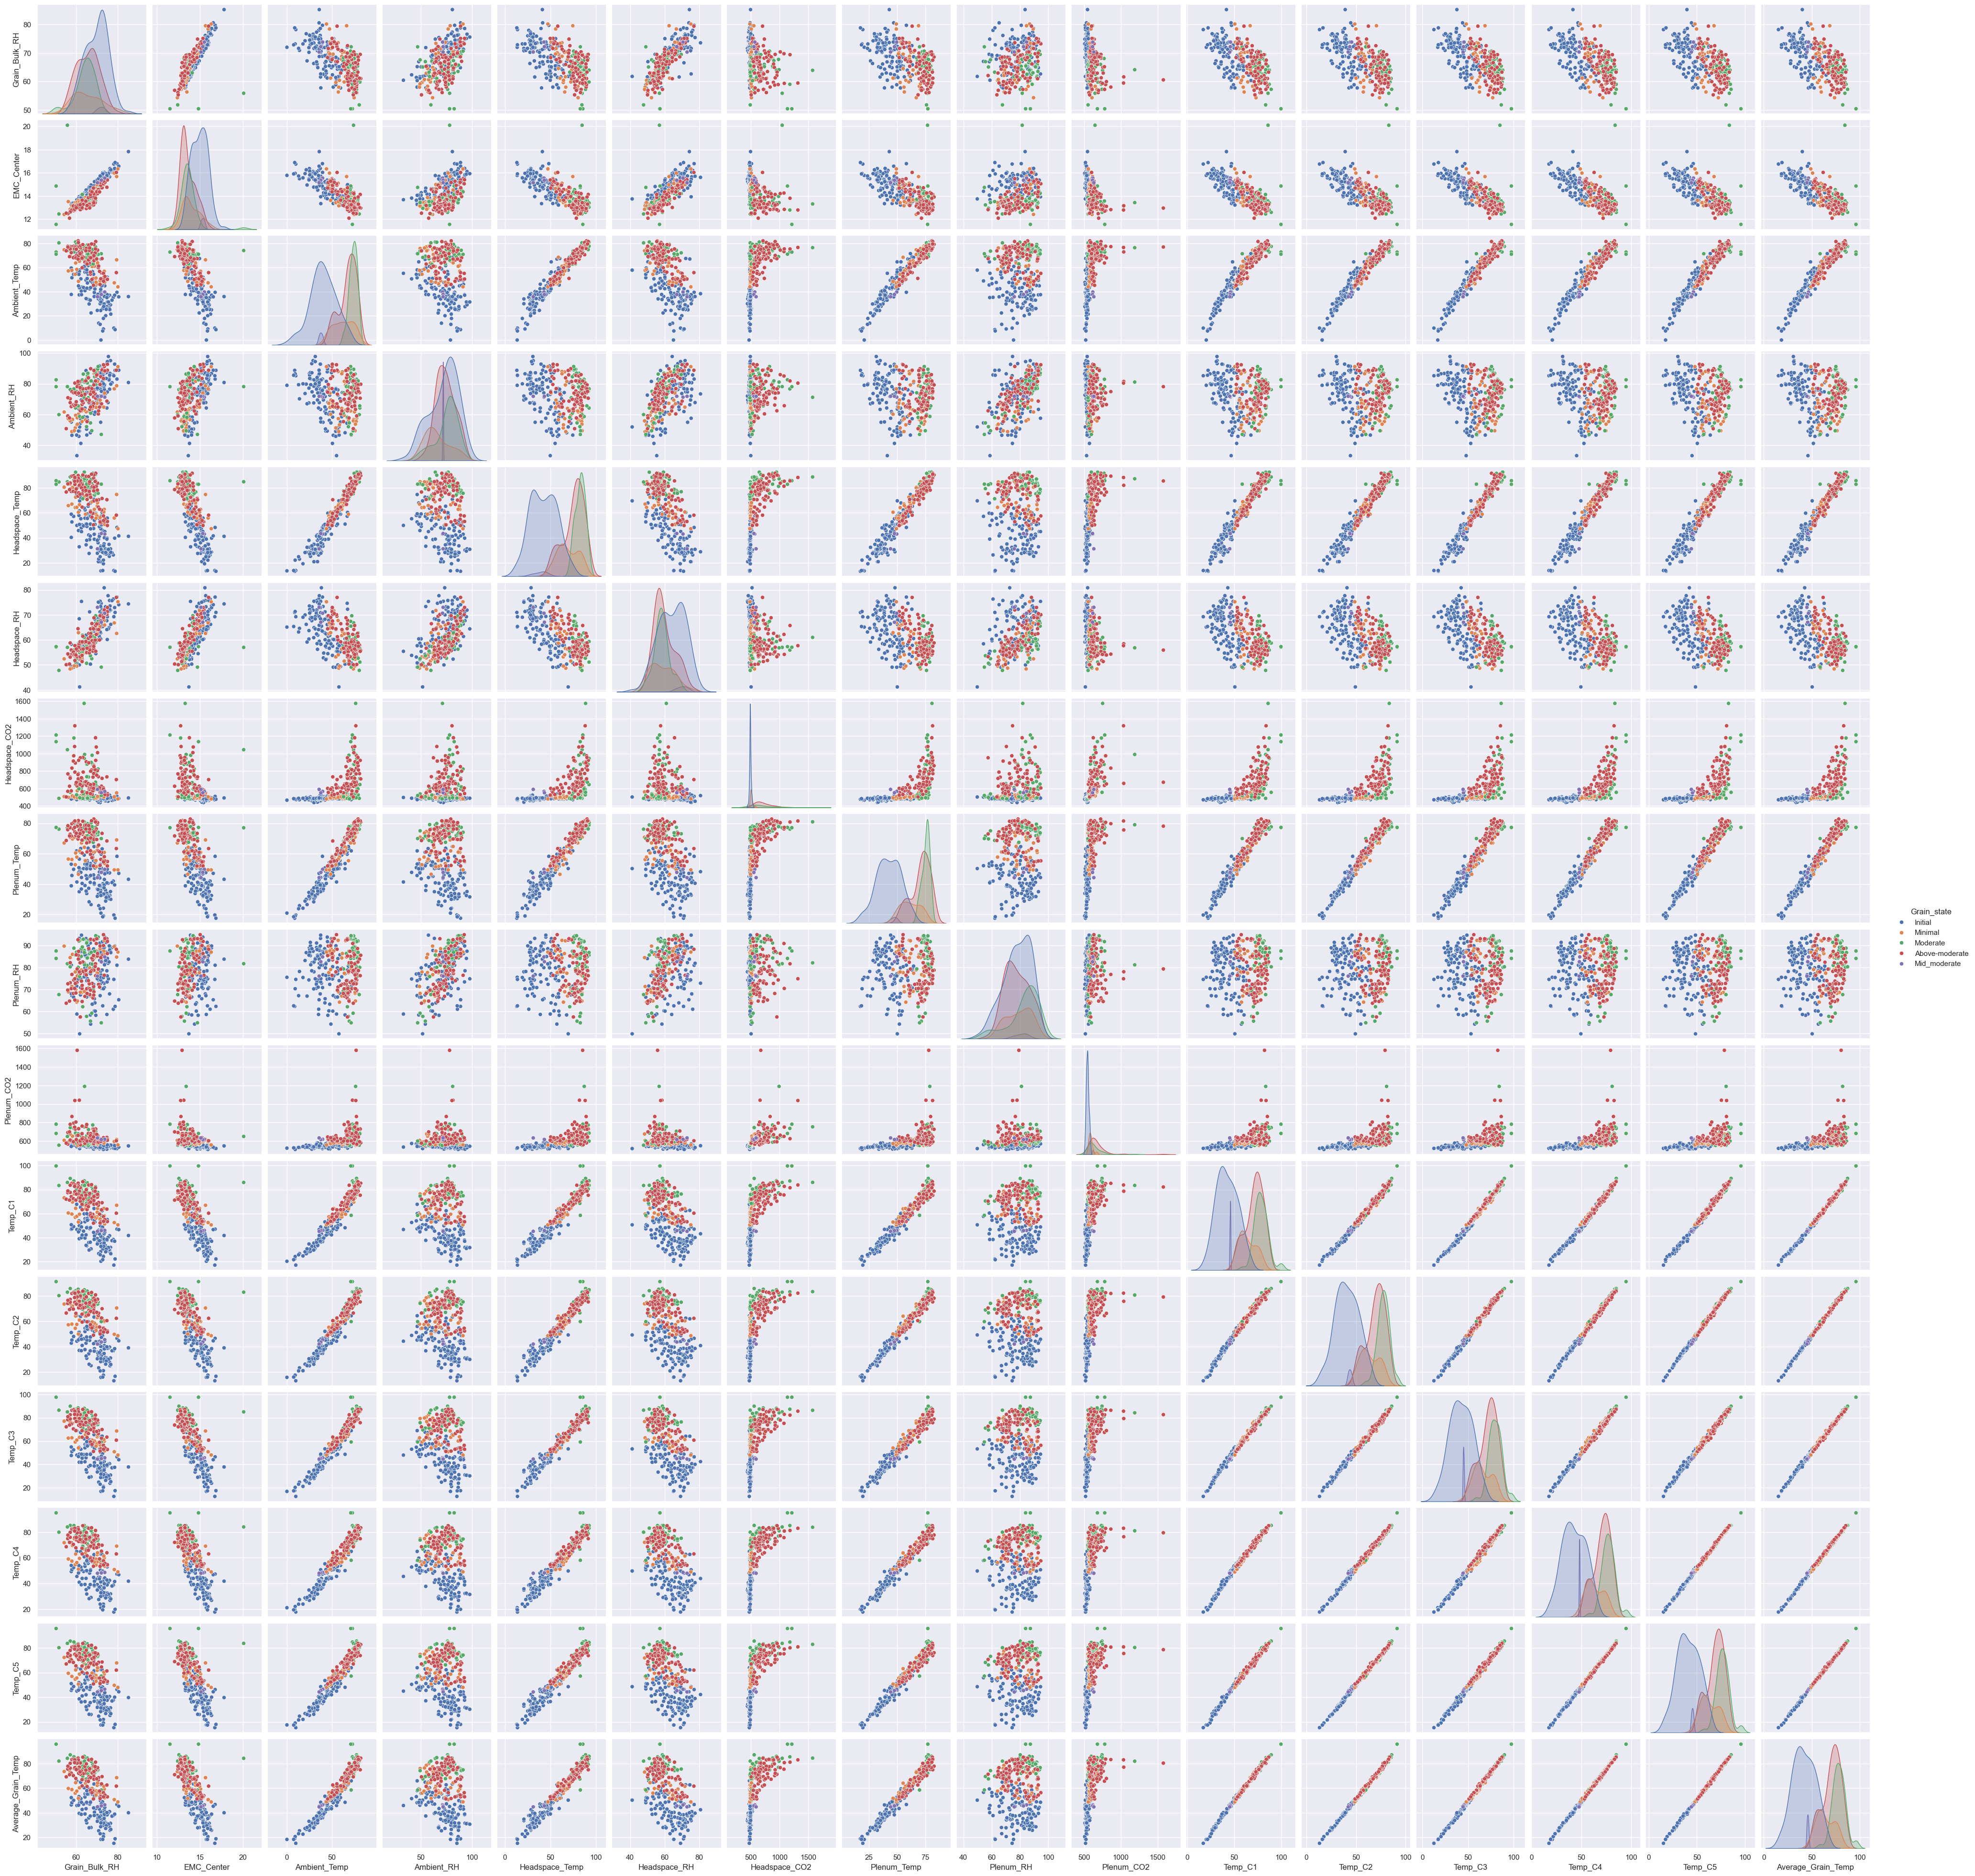

In [16]:
# Example 1 - Visualize the data using seaborn Pairplots for numerical variables + y

A = sns.pairplot(raw_data[[ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp','Grain_state']], hue = 'Grain_state')#, height = 5, kind="reg")

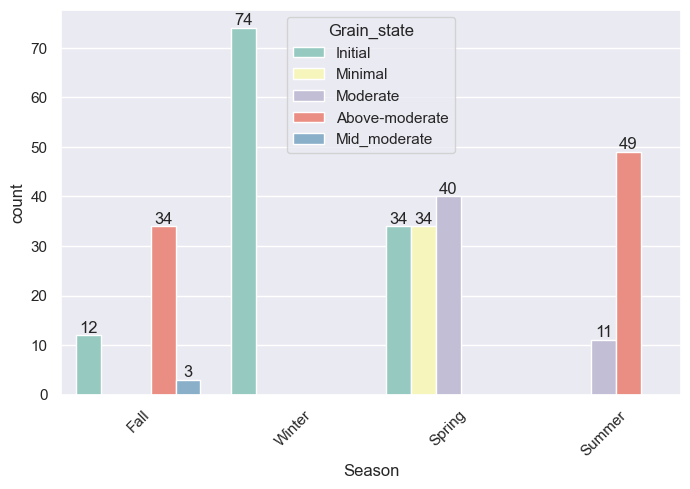

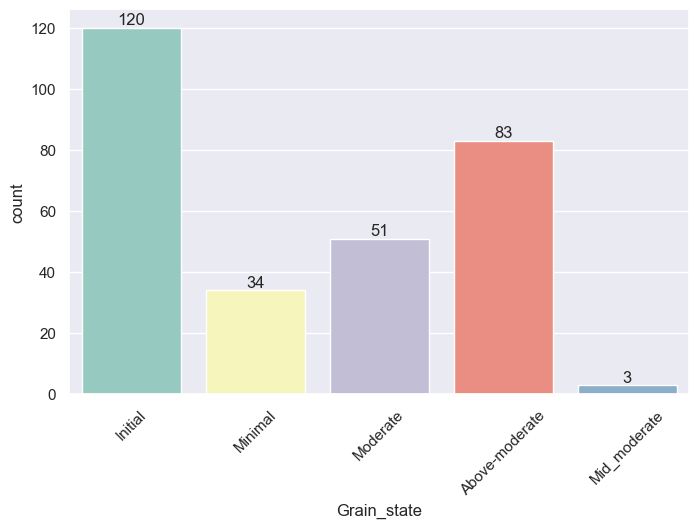

In [17]:
# Example 6 - visualize for categorical/strings variables

categories = ['Season', 'Grain_state']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for f in categories:
    ax = sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Grain_state')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.show()

In [18]:
#raw_data['Num'].unique()

In [19]:
#raw_data_clean[raw_data_clean['Num'].isna()]

In [20]:
# Increases the size of sns plots
# sns.set(rc={'figure.figsize':(14,10)})

# num_test_raw = raw_data_clean.copy()

# num_test_raw = num_test_raw[~num_test_raw['Num'].isna()]
# num_test_raw['Num'] = num_test_raw['Num'].astype(int)

# ax = sns.histplot(x = 'Num', data = num_test_raw, palette = 'Set3', hue = 'Transported', binwidth=20)


In [21]:
# checking the table

#num_test_raw[['Num', 'Transported', 'PassengerId']].groupby(['Num', 'Transported'], as_index = False).agg({'PassengerId':'count'})

In [22]:
#raw_data_clean.head()

In [23]:
# creating a new field for cabin number based on findings

# raw_data_clean['Num'][raw_data_clean['Num'].isna()] = 99999
# raw_data_clean['Num'] = raw_data_clean['Num'].astype(int)

# raw_data_clean['Cabin_Category'] = 'Uknown'
# raw_data_clean['Cabin_Category'][raw_data_clean['Num'] <= 300 ] = 'Cabin Category A'
# raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 300 ] = 'Cabin Category B'
# raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 600 ] = 'Cabin Category C'
# raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 900 ] = 'Cabin Category D'
# raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1200 ] = 'Cabin Category E'
# raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1500 ] = 'Cabin Category F'
# raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1800 ] = 'Cabin Category G'

# # putting the np.nan back
# raw_data_clean['Num'][raw_data_clean['Num'] == 99999] = np.nan

# raw_data_clean['Cabin_Category'].value_counts()

## 6. Missing Values

Since we have a lot of missing values for each variable (not the same row), we will try to fill in the missing values and not drop them. One of the most common techniques is to replace the continues values with the median and the categorical features with the mode

In [24]:
# changing missing values to mode and median

# strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP','Transported', 'Deck', 'Cabin_Category', 'Side']
# numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

# for s in strings2:
#     mode = raw_data_clean[s].mode()[0]
#     raw_data_clean[s]= raw_data_clean[s].fillna(mode)
#     raw_data_clean[s][raw_data_clean[s] == 'nan'] = mode
    
# for n in numeric2:
#     median = raw_data_clean[n].median()
#     raw_data_clean[n]= raw_data_clean[n].fillna(median)

In [25]:
# # checking for nulls
# raw_data_clean.isna().sum()

## 7. Investigating distributions

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


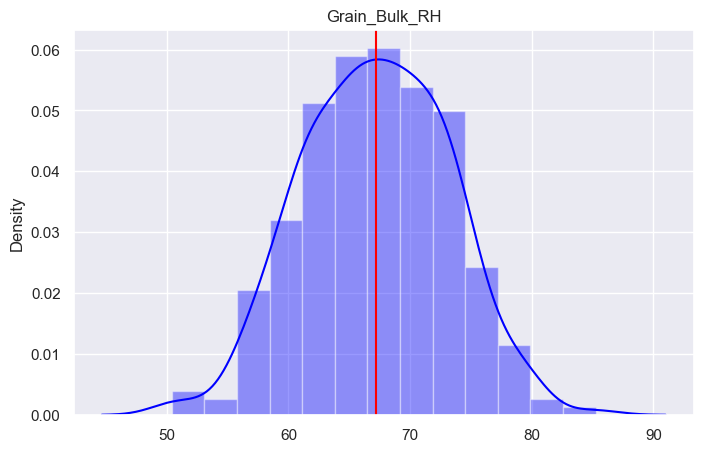

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


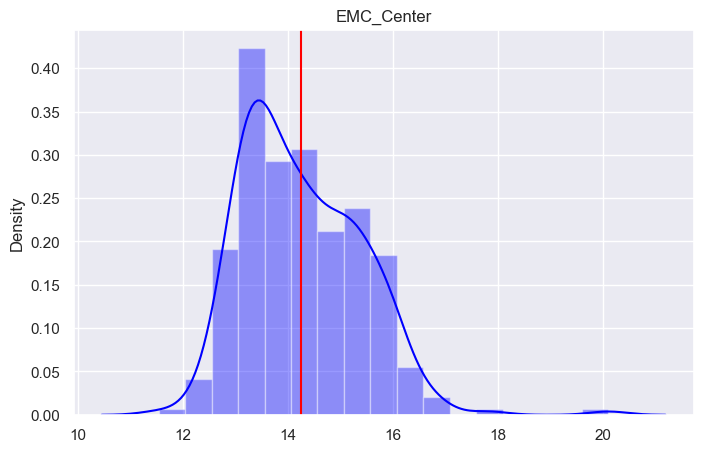

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


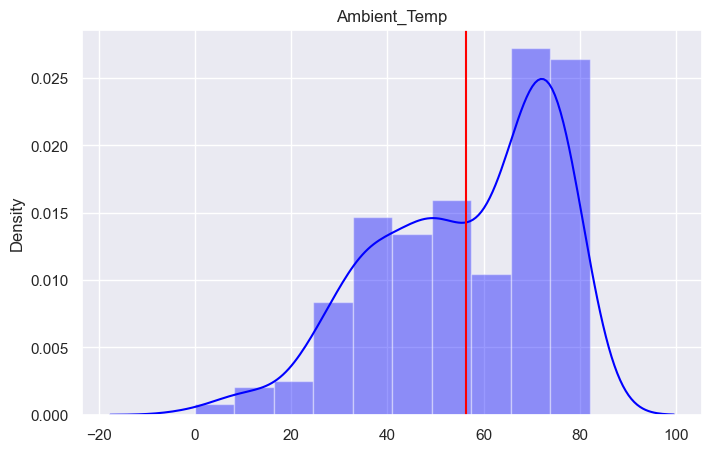

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


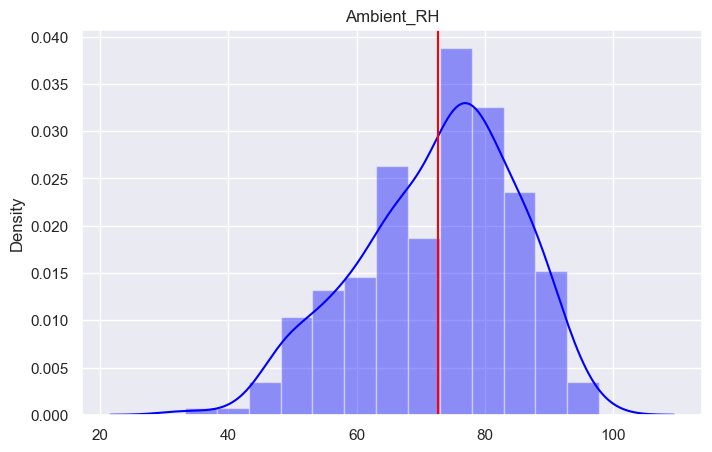

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


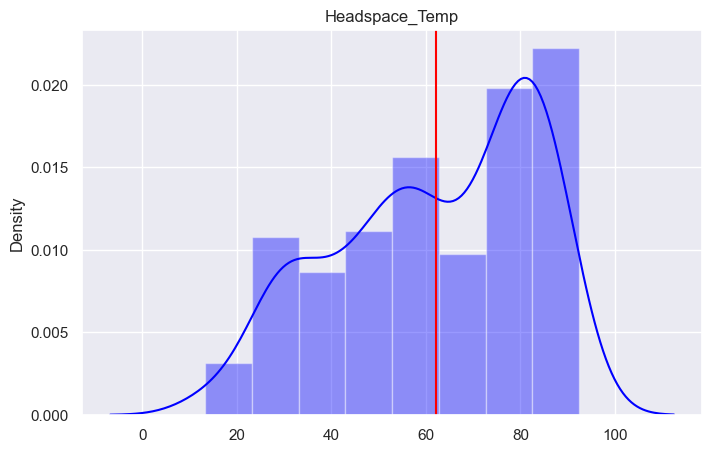

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


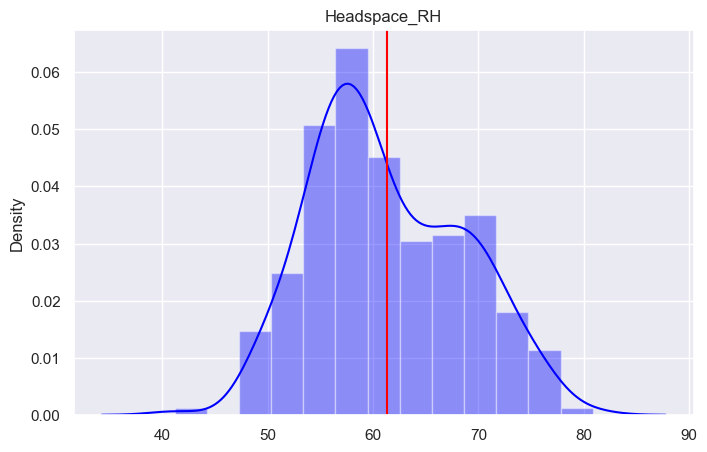

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


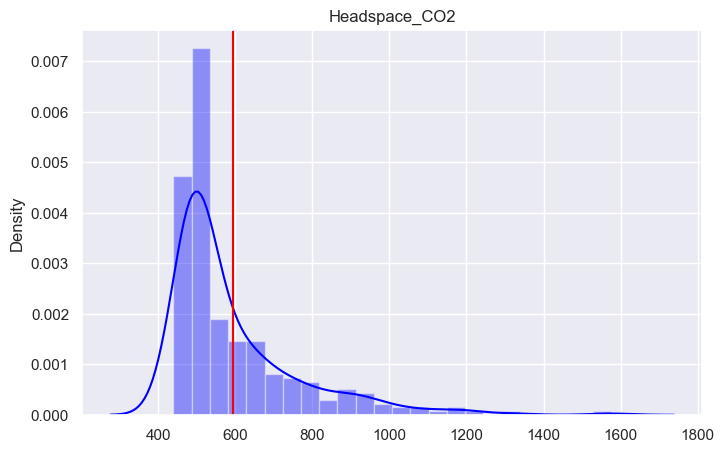

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


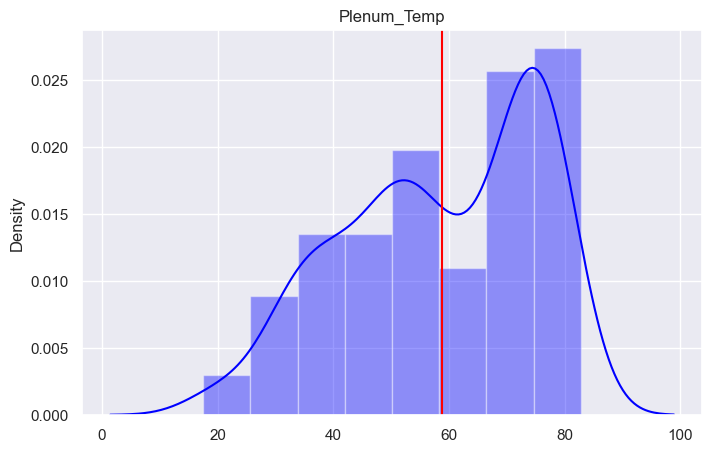

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


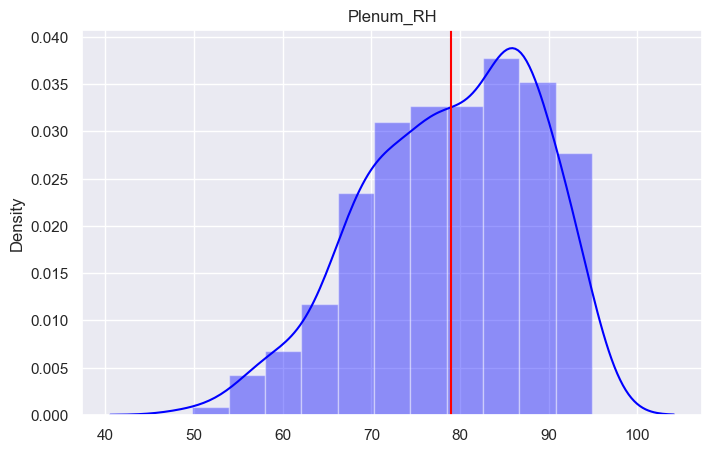

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


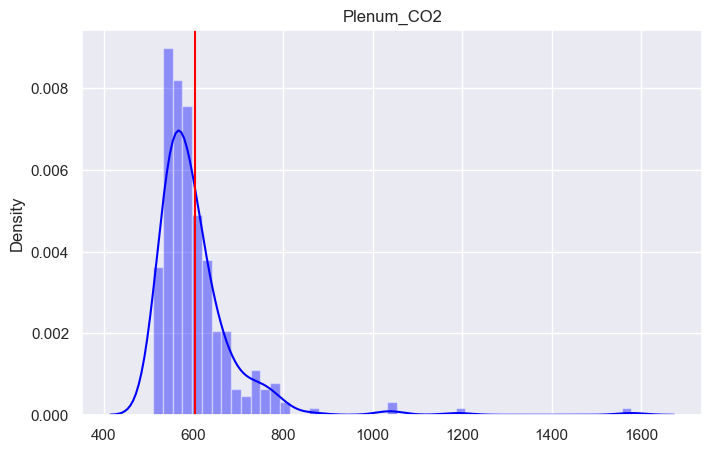

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


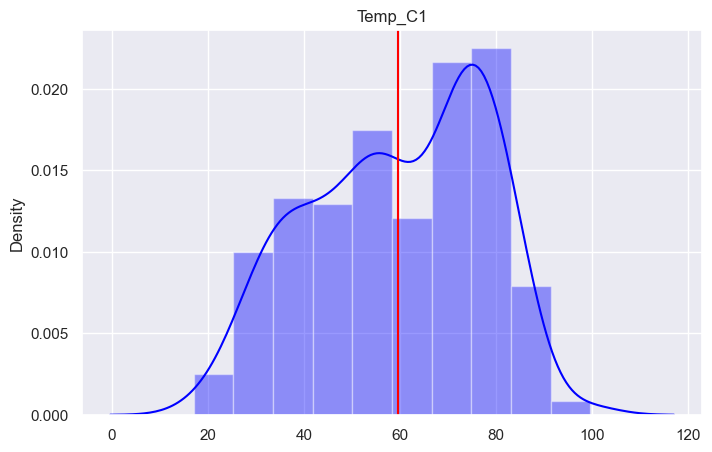

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


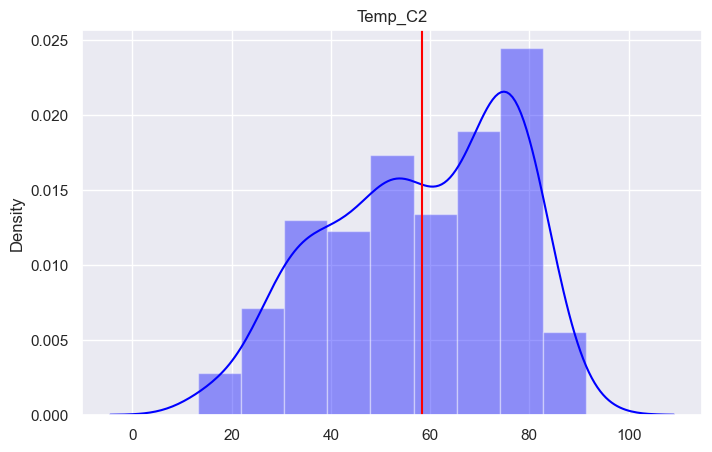

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


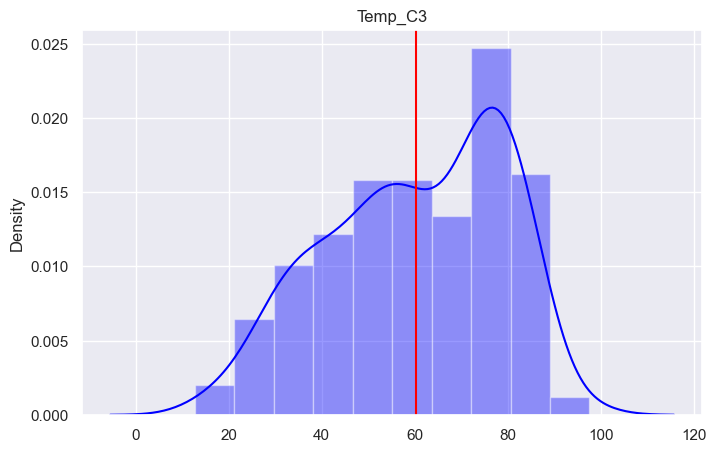

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


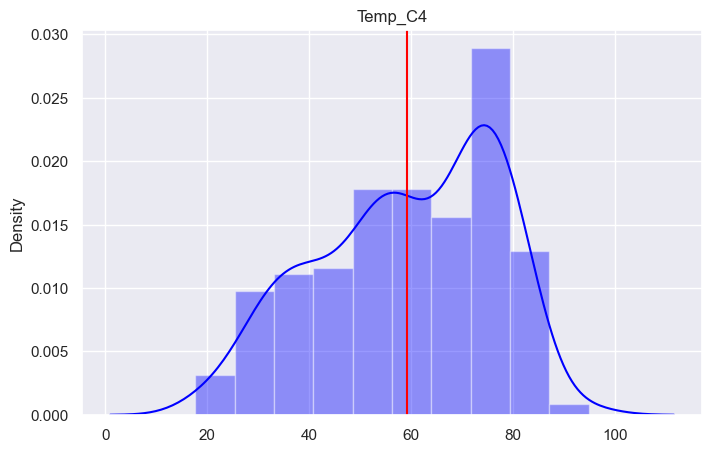

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


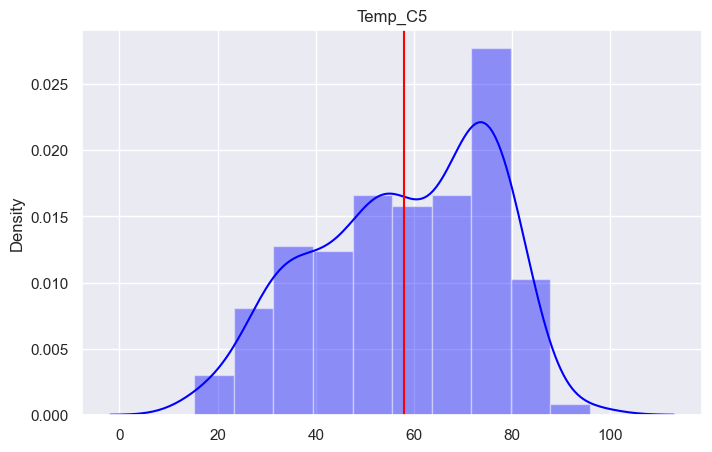

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_25060\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


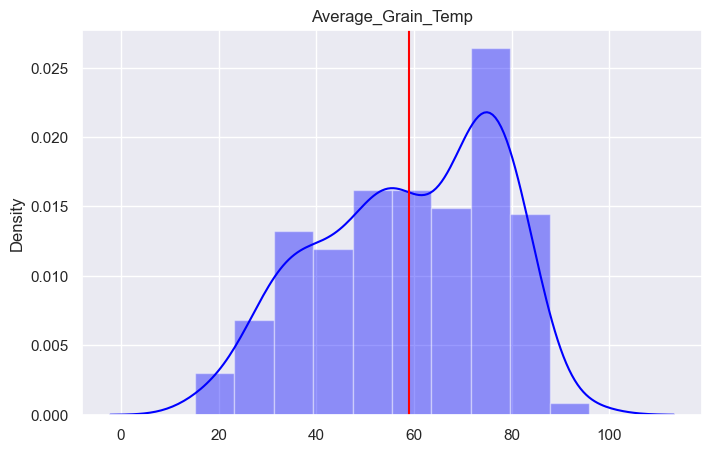

In [26]:
# Example 8 - Investigating the distribution 
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

#strings = ['Season', 'Grain_state']
#numeric = [ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
#           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']


for n in numeric:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

Grain_Bulk_RH
The meadian is:  67.0758333333333


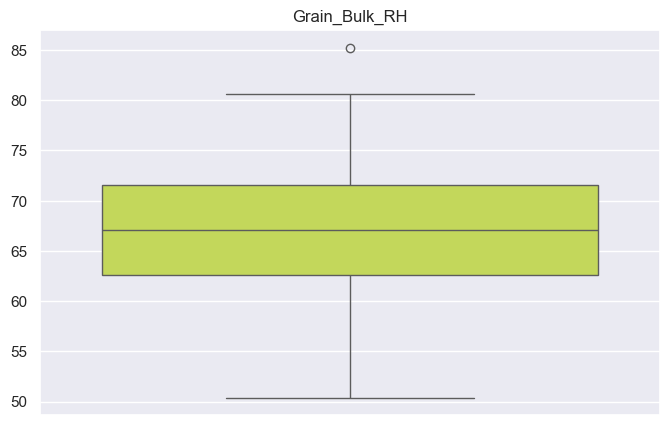

EMC_Center
The meadian is:  14.1020833333333


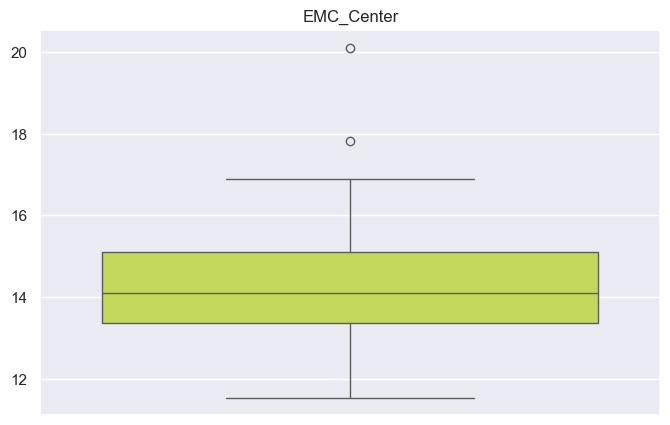

Ambient_Temp
The meadian is:  59.875


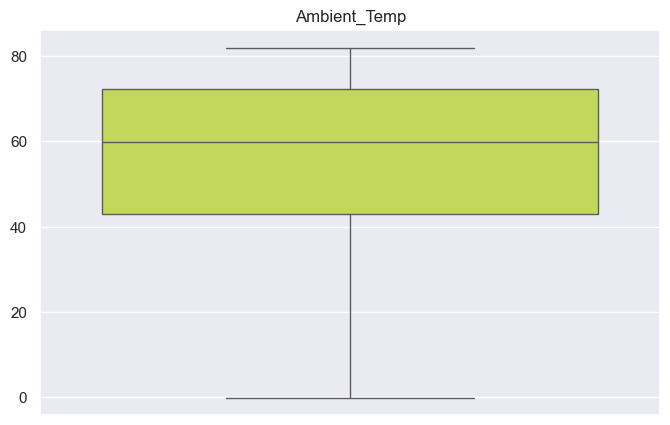

Ambient_RH
The meadian is:  74.2641666666666


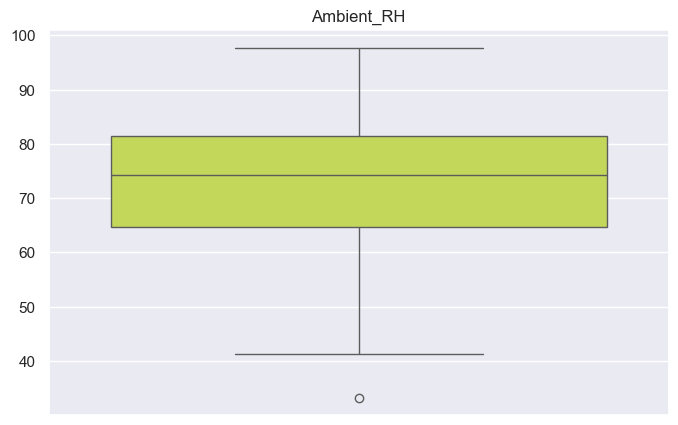

Headspace_Temp
The meadian is:  64.2897954545454


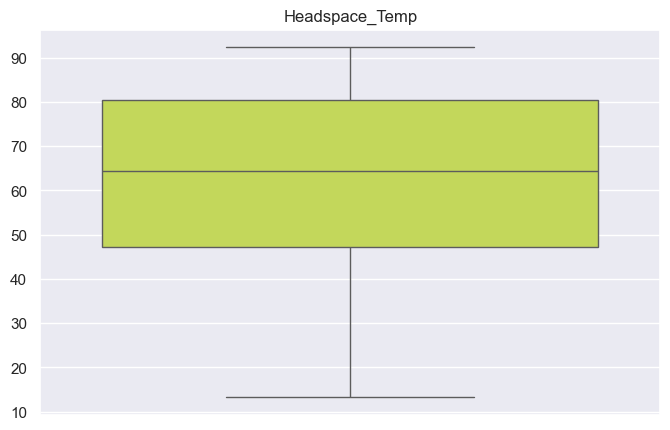

Headspace_RH
The meadian is:  59.9865916666666


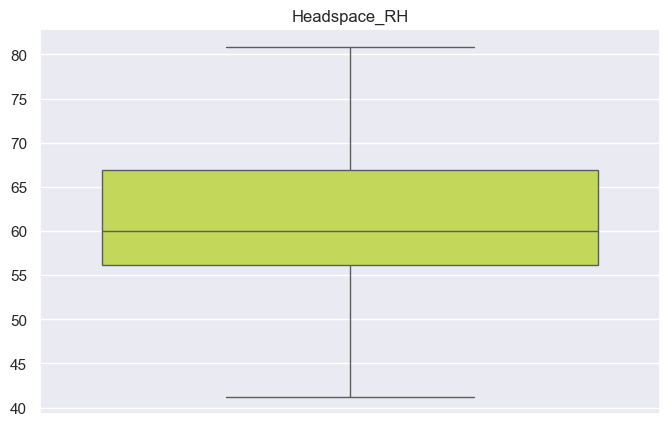

Headspace_CO2
The meadian is:  509.304347826086


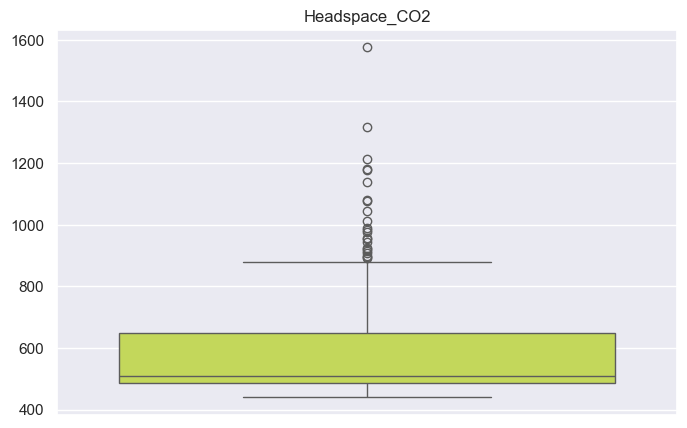

Plenum_Temp
The meadian is:  60.8175541666666


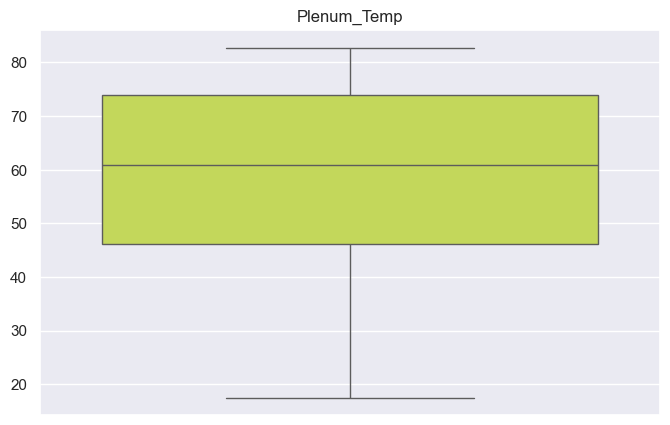

Plenum_RH
The meadian is:  79.8232041666666


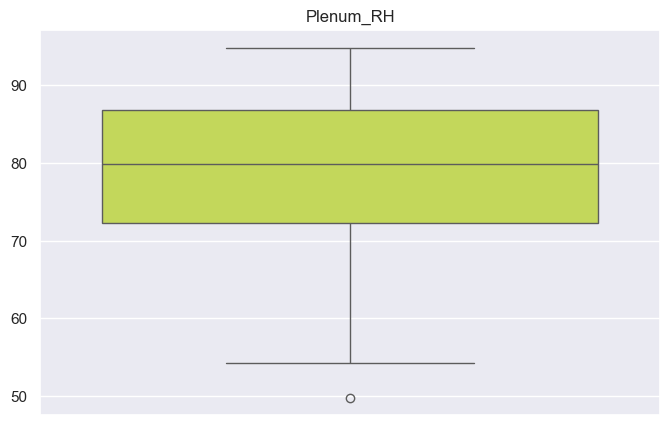

Plenum_CO2
The meadian is:  579.083333333333


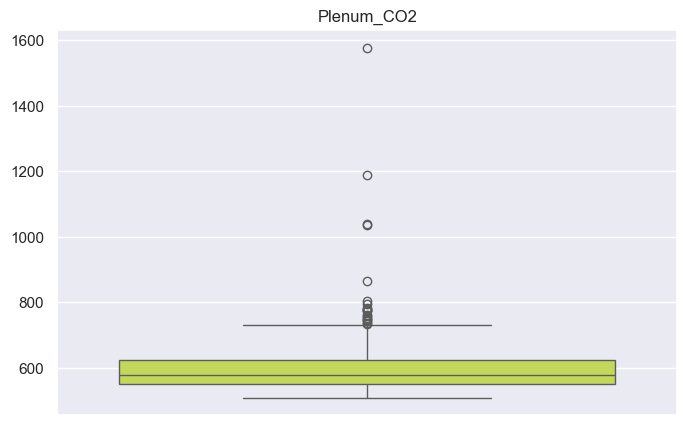

Temp_C1
The meadian is:  59.948


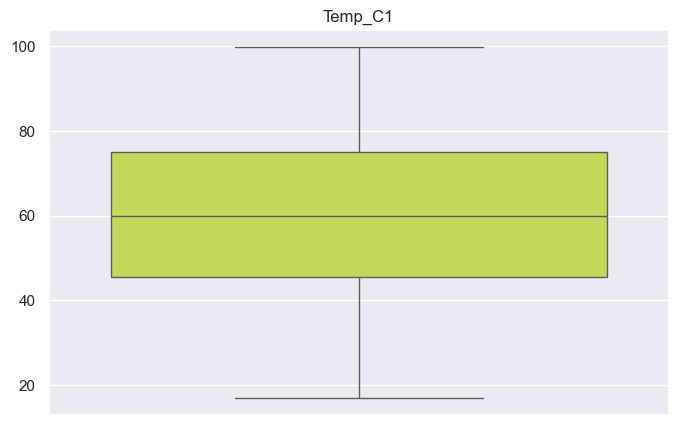

Temp_C2
The meadian is:  59.87909091


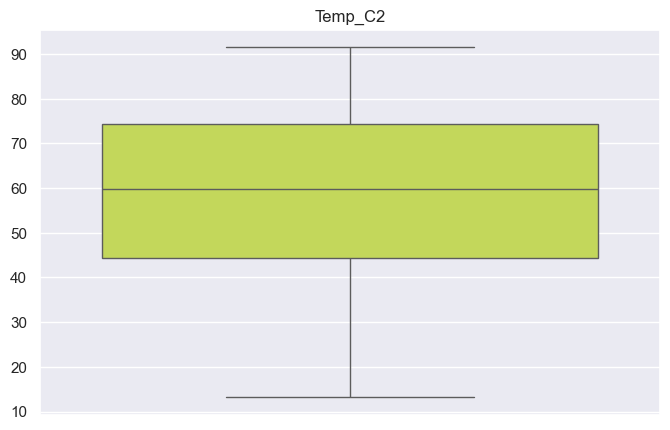

Temp_C3
The meadian is:  61.36304348


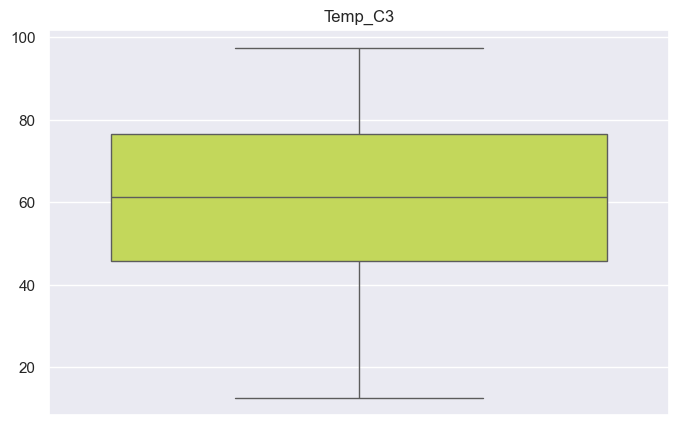

Temp_C4
The meadian is:  59.87416667


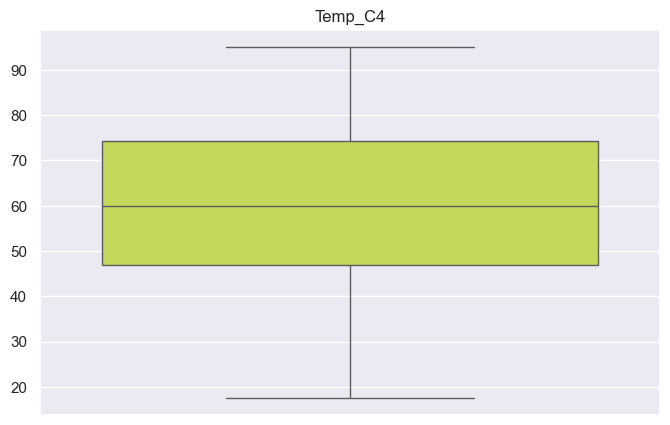

Temp_C5
The meadian is:  59.26916667


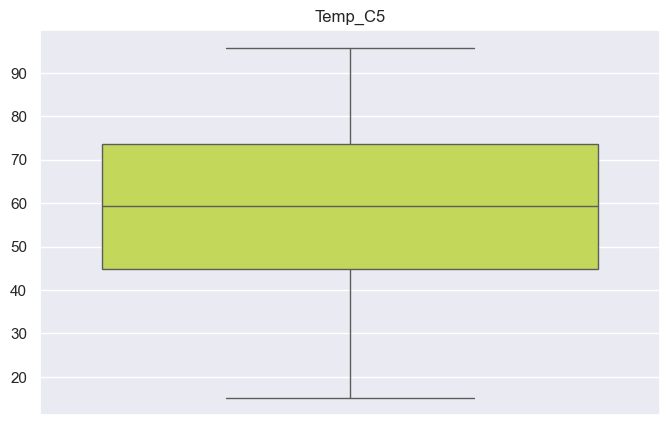

Average_Grain_Temp
The meadian is:  59.77734785


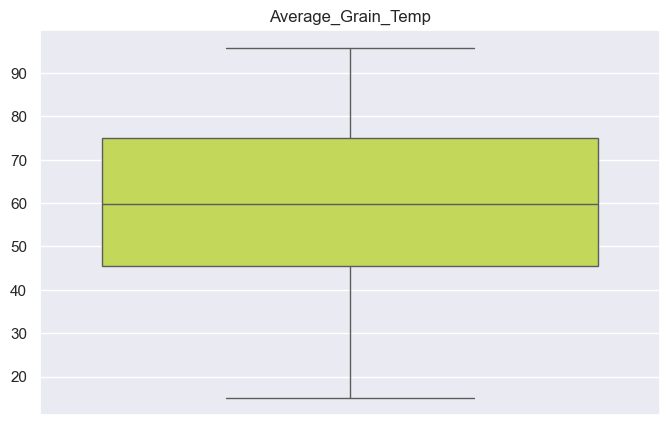

In [27]:
# Example 11 - Investigating the outliers

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in numeric:
    print(c)
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

In [28]:
raw_data[raw_data['Plenum_CO2'] > 800]

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
201      64.121667   13.425833     76.340417   81.135833       87.123033   
221      61.594167   13.154833     72.827917   81.502917       81.865033   
222      60.552500   12.954000     76.929583   78.140417       85.342930   
223      58.025385   12.820250     77.225833   74.922083       89.194279   
226      59.425000   12.788333     76.557083   80.476667       88.129091   
261      59.940000   13.101600     67.899583   66.486250       76.481846   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH   Plenum_CO2  \
201     56.829700     990.083333    79.024521  81.167829  1188.833333   
221     58.454658     658.833333    75.598433  78.023596  1040.000000   
222     55.925991     671.782609    78.096941  79.296373  1577.681818   
223     54.303950     834.208333    79.753129  76.797971   864.666667   
226     57.698696    1318.521739    81.509929  74.835467  1037.083333   
261     53.953058     652.458333    71.990283  68.359612   805.166667   

       Temp_C1    Temp_C2    Temp_C3    Temp_C4    Temp_C5  \
201  83.430833  80.898333  84.201042  81.005833  80.404167   
221  78.593333  75.945000  79.304167  76.318333  75.501667   
222  82.143333  79.334167  82.643750  79.442500  78.589167   
223  85.179231  82.100769  86.374038  82.306923  80.734615   
226  83.795000  82.365833  85.577083  82.926667  80.881667   
261  71.166667  66.424000  68.975000  67.660000  65.432000   

     Average_Grain_Temp  Season     Grain_state  
201           81.988042  Summer        Moderate  
221           77.132500  Summer  Above-moderate  
222           80.430583  Summer  Above-moderate  
223           83.339115  Summer  Above-moderate  
226           83.109250  Summer  Above-moderate  
261           67.931533    Fall  Above-moderate

In [29]:
raw_data[raw_data['Headspace_CO2'] > 1100]

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
192      58.997500   12.786417     72.815417   76.685833       85.961943   
193      50.400000   11.546000     72.736667   78.127917       85.575508   
194      50.400000   14.855833     70.970417   82.617083       82.694558   
199      63.904444   13.309826     76.389167   71.205417       88.570670   
226      59.425000   12.788333     76.557083   80.476667       88.129091   
234      69.403571   13.801500     75.297917   81.847917       85.420232   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH   Plenum_CO2  \
192     55.920557    1178.695652    76.168826  88.747143   736.391304   
193     57.065204    1213.458333    77.088067  87.474517   781.833333   
194     57.310742    1136.875000    77.299554  84.092417   682.458333   
199     60.997622    1575.217391    80.964579  82.083254   753.708333   
226     57.698696    1318.521739    81.509929  74.835467  1037.083333   
234     65.749355    1181.136364    80.851433  81.651233   626.125000   

       Temp_C1    Temp_C2    Temp_C3    Temp_C4    Temp_C5  \
192  87.122500  83.453333  87.285417  85.053333  84.793333   
193  99.640000  91.500000  97.525000  94.940000  95.800000   
194  99.640000  91.500000  97.525000  94.940000  95.800000   
199  85.967407  83.571538  86.346154  83.720769  82.909231   
226  83.795000  82.365833  85.577083  82.926667  80.881667   
234  81.490000  81.007143  82.230357  81.227857  80.100714   

     Average_Grain_Temp  Season     Grain_state  
192           85.541583  Spring        Moderate  
193           95.881000  Spring        Moderate  
194           95.881000  Summer        Moderate  
199           84.503020  Summer        Moderate  
226           83.109250  Summer  Above-moderate  
234           81.211214  Summer  Above-moderate

## 8. Scalling the data & Turning categorical values to Numeric Representation

Conclusion is that we do not want to delete the "outliers" - we will deal with this by scaling the data

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#raw_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(raw_data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
raw_data[['Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH','Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']] = \
scaler.fit_transform(raw_data[['Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']])


#numeric = [ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
#           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']

In [31]:
raw_data

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0         0.623362    0.395236      0.816719    0.513143        0.555311   
1         0.636680    0.400570      0.822113    0.643905        0.594024   
2         0.841203    0.612630      0.481341    0.772315        0.442121   
3         0.664773    0.474129      0.467192    0.622509        0.196796   
4         0.739065    0.479567      0.451443    0.670011        0.216526   
..             ...         ...           ...         ...             ...   
286       0.674408    0.424266      0.641321    0.854942        0.525264   
287       0.655401    0.435004      0.592277    0.778091        0.511610   
288       0.672257    0.466769      0.484053    0.590233        0.375689   
289       0.625275    0.445274      0.459178    0.598651        0.380982   
290       0.571957    0.420411      0.436278    0.598393        0.226654   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2  \
0        0.843374       0.086151     0.645213   0.538649    0.019937   
1        0.783597       0.084735     0.699123   0.643613    0.013538   
2        0.906230       0.062385     0.623931   0.692161    0.008578   
3        1.000000       0.070233     0.469085   0.510636    0.037766   
4        0.871680       0.074304     0.457082   0.402819    0.033397   
..            ...            ...          ...        ...         ...   
286      0.740074       0.081558     0.577066   0.961182    0.104754   
287      0.700689       0.134856     0.568298   0.890243    0.118864   
288      0.743360       0.112597     0.493003   0.775809    0.103272   
289      0.652478       0.098950     0.461939   0.727291    0.100073   
290      0.802780       0.132802     0.409313   0.582267    0.116322   

      Temp_C1   Temp_C2   Temp_C3   Temp_C4   Temp_C5  Average_Grain_Temp  \
0    0.552002  0.624452  0.606860  0.581115  0.582914            0.589342   
1    0.548308  0.631303  0.606897  0.581654  0.583494            0.590143   
2    0.363178  0.427640  0.398575  0.382907  0.384274            0.391120   
3    0.315991  0.354653  0.351030  0.337905  0.334347            0.338722   
4    0.296127  0.339552  0.329867  0.319038  0.314509            0.319705   
..        ...       ...       ...       ...       ...                 ...   
286  0.459112  0.514788  0.488769  0.490096  0.481842            0.486624   
287  0.441638  0.491223  0.475150  0.475151  0.460312            0.468453   
288  0.350151  0.414230  0.389493  0.399508  0.387299            0.387726   
289  0.347779  0.390729  0.381400  0.394591  0.374097            0.377402   
290  0.340647  0.369830  0.376487  0.390839  0.360109            0.367342   

    Season     Grain_state  
0     Fall         Initial  
1     Fall         Initial  
2     Fall         Initial  
3     Fall         Initial  
4     Fall         Initial  
..     ...             ...  
286   Fall  Above-moderate  
287   Fall  Above-moderate  
288   Fall    Mid_moderate  
289   Fall    Mid_moderate  
290   Fall    Mid_moderate  

[291 rows x 18 columns]

In [32]:
# Making categorical variables into numeric representation

# new_raw_data = pd.get_dummies(raw_data, columns = ['Season', 'Grain_state'])


# Using factorize
raw_data['Season'], _ = pd.factorize(raw_data['Season'])
raw_data['Grain_state'], _ = pd.factorize(raw_data['Grain_state'])

raw_data.head()
raw_new_data = raw_data
raw_new_data


Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0         0.623362    0.395236      0.816719    0.513143        0.555311   
1         0.636680    0.400570      0.822113    0.643905        0.594024   
2         0.841203    0.612630      0.481341    0.772315        0.442121   
3         0.664773    0.474129      0.467192    0.622509        0.196796   
4         0.739065    0.479567      0.451443    0.670011        0.216526   
..             ...         ...           ...         ...             ...   
286       0.674408    0.424266      0.641321    0.854942        0.525264   
287       0.655401    0.435004      0.592277    0.778091        0.511610   
288       0.672257    0.466769      0.484053    0.590233        0.375689   
289       0.625275    0.445274      0.459178    0.598651        0.380982   
290       0.571957    0.420411      0.436278    0.598393        0.226654   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2  \
0        0.843374       0.086151     0.645213   0.538649    0.019937   
1        0.783597       0.084735     0.699123   0.643613    0.013538   
2        0.906230       0.062385     0.623931   0.692161    0.008578   
3        1.000000       0.070233     0.469085   0.510636    0.037766   
4        0.871680       0.074304     0.457082   0.402819    0.033397   
..            ...            ...          ...        ...         ...   
286      0.740074       0.081558     0.577066   0.961182    0.104754   
287      0.700689       0.134856     0.568298   0.890243    0.118864   
288      0.743360       0.112597     0.493003   0.775809    0.103272   
289      0.652478       0.098950     0.461939   0.727291    0.100073   
290      0.802780       0.132802     0.409313   0.582267    0.116322   

      Temp_C1   Temp_C2   Temp_C3   Temp_C4   Temp_C5  Average_Grain_Temp  \
0    0.552002  0.624452  0.606860  0.581115  0.582914            0.589342   
1    0.548308  0.631303  0.606897  0.581654  0.583494            0.590143   
2    0.363178  0.427640  0.398575  0.382907  0.384274            0.391120   
3    0.315991  0.354653  0.351030  0.337905  0.334347            0.338722   
4    0.296127  0.339552  0.329867  0.319038  0.314509            0.319705   
..        ...       ...       ...       ...       ...                 ...   
286  0.459112  0.514788  0.488769  0.490096  0.481842            0.486624   
287  0.441638  0.491223  0.475150  0.475151  0.460312            0.468453   
288  0.350151  0.414230  0.389493  0.399508  0.387299            0.387726   
289  0.347779  0.390729  0.381400  0.394591  0.374097            0.377402   
290  0.340647  0.369830  0.376487  0.390839  0.360109            0.367342   

     Season  Grain_state  
0         0            0  
1         0            0  
2         0            0  
3         0            0  
4         0            0  
..      ...          ...  
286       0            3  
287       0            3  
288       0            4  
289       0            4  
290       0            4  

[291 rows x 18 columns]

## 9. Selecting the important features

#### Heatmap
- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- More Info here: https://statisticsbyjim.com/basics/correlations/

In [33]:
raw_new_data.columns

Index(['Grain_Bulk_RH', 'EMC_Center', 'Ambient_Temp', 'Ambient_RH',
       'Headspace_Temp', 'Headspace_RH', 'Headspace_CO2', 'Plenum_Temp',
       'Plenum_RH', 'Plenum_CO2', 'Temp_C1', 'Temp_C2', 'Temp_C3', 'Temp_C4',
       'Temp_C5', 'Average_Grain_Temp', 'Season', 'Grain_state'],
      dtype='object')

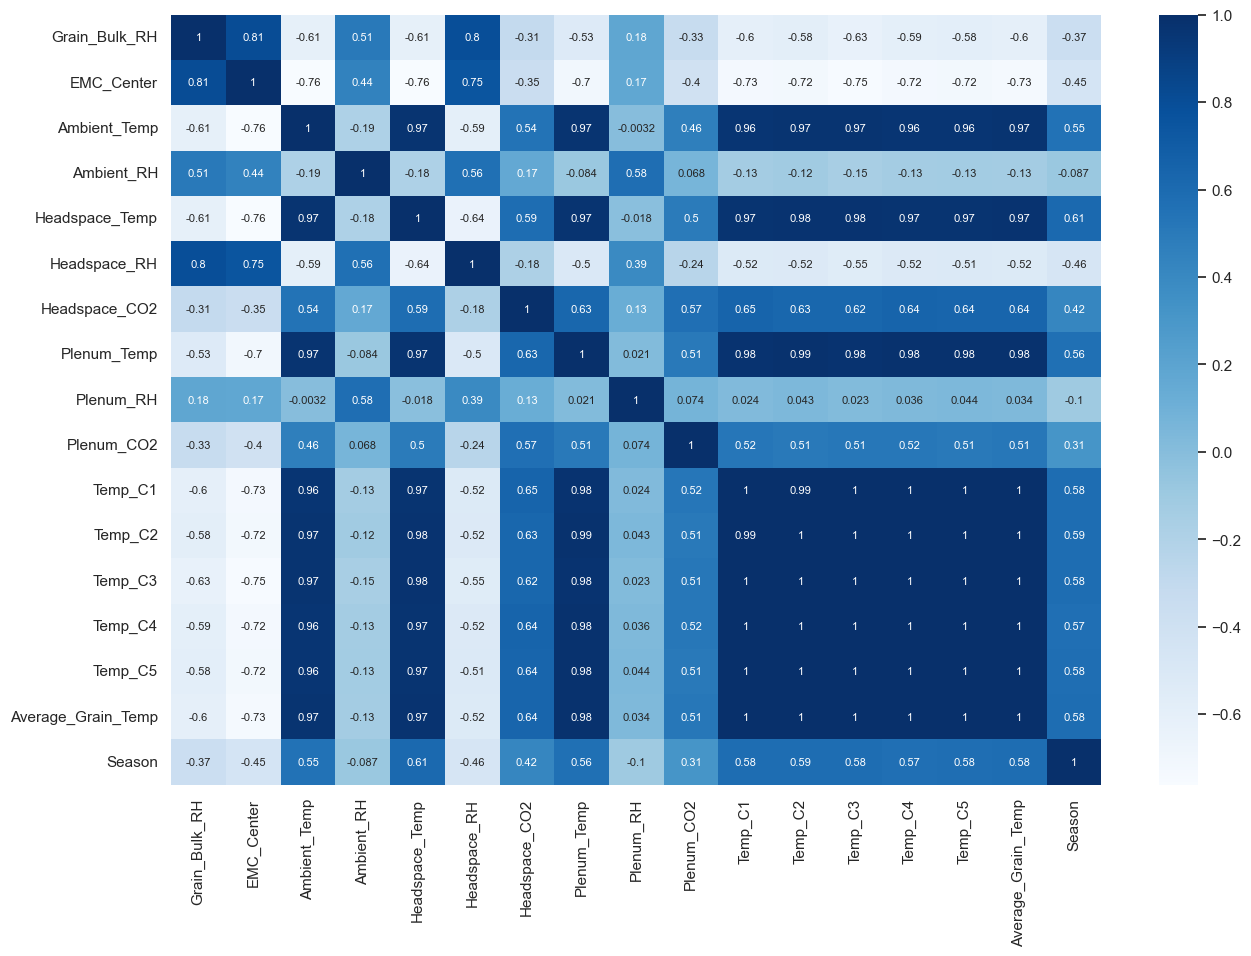

In [34]:
# droping columns we don't need
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['Grain_Bulk_RH', 'EMC_Center', 'Ambient_Temp', 'Ambient_RH',
       'Headspace_Temp', 'Headspace_RH', 'Headspace_CO2', 'Plenum_Temp',
       'Plenum_RH', 'Plenum_CO2', 'Temp_C1', 'Temp_C2', 'Temp_C3', 'Temp_C4',
       'Temp_C5', 'Average_Grain_Temp', 'Season']

pc = raw_new_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':8},
                 cmap="Blues")

### Feature Importance

Steps of Running Feature Importance

- Split the data into X & y

- Run a Tree-based estimators (i.e. decision trees & random forests)

- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

More info: https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [35]:
from sklearn.tree import DecisionTreeClassifier

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Split the data into X & y

X = raw_new_data.drop(['Grain_state'], axis = 1).values
X_columns = raw_new_data.drop(['Grain_state'], axis = 1)
y = raw_new_data['Grain_state']

print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Calculating FI
for i, column in enumerate(raw_new_data.drop(['Grain_state'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi


(291, 17)
(291,)
Importance of feature Grain_Bulk_RH:, 0.016
Importance of feature EMC_Center:, 0.028
Importance of feature Ambient_Temp:, 0.013
Importance of feature Ambient_RH:, 0.015
Importance of feature Headspace_Temp:, 0.000
Importance of feature Headspace_RH:, 0.005
Importance of feature Headspace_CO2:, 0.370
Importance of feature Plenum_Temp:, 0.100
Importance of feature Plenum_RH:, 0.017
Importance of feature Plenum_CO2:, 0.089
Importance of feature Temp_C1:, 0.153
Importance of feature Temp_C2:, 0.063
Importance of feature Temp_C3:, 0.000
Importance of feature Temp_C4:, 0.019
Importance of feature Temp_C5:, 0.000
Importance of feature Average_Grain_Temp:, 0.006
Importance of feature Season:, 0.106


index            Variable  Feature Importance Score
0       6       Headspace_CO2                  0.369601
1      10             Temp_C1                  0.153393
2      16              Season                  0.106404
3       7         Plenum_Temp                  0.100026
4       9          Plenum_CO2                  0.089260
5      11             Temp_C2                  0.062520
6       1          EMC_Center                  0.028244
7      13             Temp_C4                  0.018622
8       8           Plenum_RH                  0.016729
9       0       Grain_Bulk_RH                  0.016486
10      3          Ambient_RH                  0.014746
11      2        Ambient_Temp                  0.012536
12     15  Average_Grain_Temp                  0.006483
13      5        Headspace_RH                  0.004948
14      4      Headspace_Temp                  0.000000
15     12             Temp_C3                  0.000000
16     14             Temp_C5                  0.000000

## 10. Training & Running the classification model

In [36]:

from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

#Spliting the data as 
X_train, X_temp, Y_train, Y_temp = train_test_split(X,y, test_size=0.3, random_state=0)
X_Validation, X_test, Y_Validation, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)


# train with Gradient Boosting algorithm
#training to obtain the learning rates that gives the maximum accuracy (6 times)
# compute the accuracy scores on train and validation sets when training with different learning rates

#Applying hyper parameter tuning: 
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_Validation, Y_Validation)))
    print()



Learning rate:  0.05
Accuracy score (training): 0.901
Accuracy score (validation): 0.795

Learning rate:  0.1
Accuracy score (training): 0.936
Accuracy score (validation): 0.864

Learning rate:  0.25
Accuracy score (training): 0.990
Accuracy score (validation): 0.841

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.841



Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.818

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.841



In [37]:
# training and fitting the data
 

clf = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
clf.fit(X_train, Y_train)

#import a library to save the model

from joblib import dump
#save the model to a file #GBC means GradientBoostingClassifier algorithm

model_filename = 'Model_developed_GBC.joblib'
dump(clf, model_filename)

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)

y_pred = clf.predict(X_test)
#print('Score', clf.score(X, y))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()
print("Classification Report")
print(classification_report(Y_test, y_pred))

# pred_proba_t = clf.predict_proba(X_test)
# log_loss = log_loss(Y_test, y_pred)
# log_loss


# print('Log Loss', log_loss)


Confusion Matrix:
[[15  1  0  0]
 [ 1  4  1  0]
 [ 0  0  7  0]
 [ 0  1  1 13]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.67      0.67      0.67         6
           2       0.78      1.00      0.88         7
           3       1.00      0.87      0.93        15

    accuracy                           0.89        44
   macro avg       0.85      0.87      0.85        44
weighted avg       0.90      0.89      0.89        44



In [38]:
# How to load the developed model from my file if i want to test new data 

#from joblib import load
# Load the model from the file
# model = load(model_filename)

#using the model after loading.
# once loaded, the model is ready to be used for predictions or further evaluation

# use the loaded model to make predictions
#predictions = model.predict(X_test)

#Evaluate the model

#from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(y_test, predictions)

#print(f"Test Accuracy: {accuracy:.2f}") 

In [39]:
# training and fitting the data
 # train random forest training algorithm

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\base.py", line 666, in _validate_para

{'n_estimators': 140,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [41]:
# training and fitting the data
 # train random forest training algorithm

rfa = RandomForestClassifier(n_estimators= 40,
  min_samples_split = 2,
  min_samples_leaf= 1,
  max_features = 'sqrt',
  max_depth = None,
  bootstrap = False, random_state = 0)


rfa.fit(X_train, Y_train)

#save the model to a file #GBC means GradientBoostingClassifier algorithm

model_filename = 'Model_developed_Randomfoest.joblib'
dump(rfa, model_filename)

y_pred = rfa.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()
print("Classification Report")
print(classification_report(Y_test, y_pred))

Confusion Matrix:
[[15  0  1  0]
 [ 2  3  1  0]
 [ 0  1  6  0]
 [ 0  1  2 12]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.60      0.50      0.55         6
           2       0.60      0.86      0.71         7
           3       1.00      0.80      0.89        15

    accuracy                           0.82        44
   macro avg       0.77      0.77      0.76        44
weighted avg       0.84      0.82      0.82        44



In [42]:
# SVM algorithm

from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.439 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.439 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.854 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .....C=100, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [48]:

# train the model on train set 

SVM_model = SVC(C=100, gamma=1) 
SVM_model.fit(X_train, Y_train) 


# print prediction results 
# predictions = model.predict(X_test) 
# print(confusion_matrix(Y_test, predictions))
# print(classification_report(Y_test, predictions)) 


model_filename = 'Model_developed_SVM.joblib'
dump(SVM_model, model_filename)

y_pred = SVM_model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(Y_test, y_pred))
# print()
# print("Classification Report")
# print(classification_report(Y_test, y_pred))

[[14  1  0  0  1]
 [ 2  2  2  0  0]
 [ 1  0  6  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.67      0.33      0.44         6
           2       0.60      0.86      0.71         7
           3       1.00      0.87      0.93        15
           4       0.00      0.00      0.00         0

    accuracy                           0.80        44
   macro avg       0.62      0.59      0.59        44
weighted avg       0.83      0.80      0.80        44



u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### Pre-processing the Test data & Running the model on it & Sumbiting it

In [46]:
######################################     Loading the data   #############################################
test_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######################################     # chaning the types so we can visualize   #####################################
strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for s in strings:
    test_data[s] = test_data[s].astype(str)
    
for n in numeric:
    test_data[n] = test_data[n].astype(float)

##################################     # adding 3 more columns   #############################################
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True) 

del test_data['Cabin']

############################     # creating a new field for cabin number based on findings   #############################################

test_data['Num'][test_data['Num'].isna()] = 99999
test_data['Num'] = test_data['Num'].astype(int)

test_data['Cabin_Category'] = 'Uknown'
test_data['Cabin_Category'][test_data['Num'] <= 300 ] = 'Cabin Category A'
test_data['Cabin_Category'][test_data['Num'] > 300 ] = 'Cabin Category B'
test_data['Cabin_Category'][test_data['Num'] > 600 ] = 'Cabin Category C'
test_data['Cabin_Category'][test_data['Num'] > 900 ] = 'Cabin Category D'
test_data['Cabin_Category'][test_data['Num'] > 1200 ] = 'Cabin Category E'
test_data['Cabin_Category'][test_data['Num'] > 1500 ] = 'Cabin Category F'
test_data['Cabin_Category'][test_data['Num'] > 1800 ] = 'Cabin Category G'

# putting the np.nan back
test_data['Num'][test_data['Num'] == 99999] = np.nan

##################################        changing missing values to mode and median   ##################################

strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side']
numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

for s in strings2:
    mode = test_data[s].mode()[0]
    test_data[s]= test_data[s].fillna(mode)
    test_data[s][test_data[s] == 'nan'] = mode
    
for n in numeric2:
    test_data[n]= test_data[n].astype(float)
    median = test_data[n].median()
    test_data[n]= test_data[n].fillna(median)
    
##################################        Scaling the data   ##################################
test_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(test_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])


##################################         Making categorical variables into numeric representation      ##################################        
test_data = pd.get_dummies(test_data, columns = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side'])


##################################       # Split the data into X & y        ##################################       

X_test = test_data.drop(['PassengerId','Name'], axis = 1).values

 
###############################        Making Predictions       #################################
y_pred = clf.predict(X_test)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission1.csv', index=False)

#output

# This Model gives an accuracy of 0.78770 and a place of 1000+
# Score: 0.78957


ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [ ]:
output

## 11. Model Optimization

In [ ]:
# pip uninstall xgboost 

In [ ]:
#pip install xgboost==0.90

In [ ]:
################################################    OPTIMISED   ############################################################

from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Log Loss', log_loss)

In [ ]:
###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission2.csv', index=False)

output

# This Model gives an accuracy of 0.79331 and a place of 700+

## 12. Trying a new way of replacing missing values

### 12.1. Applying the same steps as before exept the "replacing missing values" & "get dummies"

In [ ]:
######################################     Loading the data   #############################################
raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
test_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")

# printing the shapes
print('raw_data',raw_data.shape)
print('test_data',test_data.shape)

# combining the 2 datasets
raw_data = pd.concat([raw_data.drop(['Transported'], axis = 1), test_data])
print('raw_data',raw_data.shape)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######################################     # chaning the types so we can visualize   #####################################
strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for s in strings:
    raw_data[s] = raw_data[s].astype(str)
    
for n in numeric:
    raw_data[n] = raw_data[n].astype(float)

##################################     # adding 3 more columns   #############################################
raw_data[['Deck', 'Num', 'Side']] = raw_data['Cabin'].str.split('/', expand=True) 

del raw_data['Cabin']

############################     # creating a new field for cabin number based on findings   #############################################

raw_data['Num'][raw_data['Num'].isna()] = 99999
raw_data['Num'] = raw_data['Num'].astype(int)

raw_data['Cabin_Category'] = 'Uknown'
raw_data['Cabin_Category'][raw_data['Num'] <= 300 ] = 'Cabin Category A'
raw_data['Cabin_Category'][raw_data['Num'] > 300 ] = 'Cabin Category B'
raw_data['Cabin_Category'][raw_data['Num'] > 600 ] = 'Cabin Category C'
raw_data['Cabin_Category'][raw_data['Num'] > 900 ] = 'Cabin Category D'
raw_data['Cabin_Category'][raw_data['Num'] > 1200 ] = 'Cabin Category E'
raw_data['Cabin_Category'][raw_data['Num'] > 1500 ] = 'Cabin Category F'
raw_data['Cabin_Category'][raw_data['Num'] > 1800 ] = 'Cabin Category G'
raw_data['Cabin_Category'][raw_data['Num'] > 9800 ] = np.nan

# putting the np.nan back
raw_data['Num'][raw_data['Num'] == 99999] = np.nan


##################################        Scaling the data   ##################################
raw_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(raw_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# droping the name 
del raw_data['Name']

In [ ]:
raw_data.head()

## 12.2. Dealing with missing values

### Notes:
- As we have lots of missing values per column, we will try an interesting strategy
- We will combine both the datasets
- We will run XGBoost per column to make a prediction
- We will replace the missing values with the predictions

In [ ]:
from sklearn.metrics import log_loss


# defining strings to loop through
strings = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Side','Cabin_Category']   ##### REMEMBER TO CHANGE THIS!!!
numeric = ['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# chaning the ID to use later to rejoin
raw_data['PassengerId'] = raw_data['PassengerId'].astype(str)
raw_data['PassengerId'] = raw_data['PassengerId'].str.replace('_','').astype(int)


#strings = ['HomePlanet']

try:
    del Scores_df
    del data
except:
    print("")
    
for c in strings:
    print(c)
    
    # creating a coppy
    data = raw_data.copy()
    
    # updating the numbers with median
    for n in numeric:
        median = data[n].median()
        data[n] = data[n].fillna(median)
    
    # updating the categories with Unknown
    for s in strings:
        data[s] = data[s].fillna('Unknown')
        data[s][data[s]=='nan'] = 'Unknown'
        
    # list without the y
    strings_without_y = strings.copy()
    if c in strings_without_y: strings_without_y.remove(c)
        
    # turning categorical values into numeric representation
    data = pd.get_dummies(data, columns = strings_without_y)
    
    #droping "Unkown"
    data2 = data[data[c] != 'Unknown']
    
    # data for only unkowns
    data_unknown = data[data[c]=='Unknown']    
    
    # separating the X and Y
    X = data2.drop([c], axis = 1).values
    y = data2[c].astype(str).values
    
    # running the model
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
    print('Score', clf.score(X, y))
    
    # saving the scores in df to evaluate later
    score = clf.score(X, y)
    log_loss_score = log_loss(y, clf.predict_proba(X))
    
    score2 = pd.DataFrame({'Variable': [c], 'Score': [score], 'Log Loss': [log_loss_score]})
    
    try:
        Scores_df = pd.concat([Scores_df,score2], ignore_index = True)
    except:
        Scores_df = score2
    
    # X for unkown - making predictions on the missing values
    X_unknown = data_unknown.drop([c], axis = 1).values
    y_pred = clf.predict(X_unknown)
    
    data_unknown['Prediction'] = y_pred.astype(str)
    
    # limiting the df
    data_unknown = data_unknown[['PassengerId','Prediction']]
    data_unknown.columns = ['PassengerId','Prediction'+'-'+c]
    
    # left joining the predictions back to the original dataframe
    combined_data_with_predictions = raw_data.merge(data_unknown, how = 'left', on = 'PassengerId')
    
    #left joining on original file so we have less missing values in the next loop
    raw_data = raw_data.merge(data_unknown, how = 'left', on = 'PassengerId')
    raw_data[c][raw_data[c].isna()] = raw_data['Prediction'+'-'+c]
    raw_data[c][raw_data[c] == 'nan'] = raw_data['Prediction'+'-'+c]
    del raw_data['Prediction'+'-'+c]  
    
    
  

In [ ]:
raw_data.isna().sum()

In [ ]:
Scores_df

In [ ]:
raw_data.isnull().sum()

In [ ]:
# Repeating the same process for Numerics


for n in numeric:
    print(n)
    
    # creating a coppy
    data = raw_data.copy()
    
    # changing the target column to "Unkown"
    data[n][data[n].isnull()] = "Unkown"
    
    # list without the y
    strings_without_y = numeric.copy()
    if n in strings_without_y: strings_without_y.remove(n)
    
    # updating the numbers with mean
    for nu in strings_without_y:
        mean_v = data[nu].mean()
        data[nu] = data[nu].fillna(mean_v)
    
    # turning categorical values into numeric representation
    data = pd.get_dummies(data, columns = strings)
    
    # data for only kowns 
    data2 = data[data[n] != "Unkown"]
    
    # data for only unkowns
    data_unknown = data[data[n]=="Unkown"]

    # separating the X and Y
    X = data2.drop([n], axis = 1).values
    y = data2[n].values
    
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X, y)

    # Model Accuracy on testing dataset
    print('The Accuracy  on the testing dataset is: ', reg.score(X, y) )
    print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y,reg.predict(X))))
    print('The MAE  on the testing dataset is: ',mean_absolute_error(y,reg.predict(X)))

    # saving the scores in df to evaluate later
    score = reg.score(X, y)
    score2 = pd.DataFrame({'Variable': [n], 'Score': [score]})
    
    try:
        Scores_df = pd.concat([Scores_df,score2], ignore_index = True)
    except:
        Scores_df = score2
    
    # X for unkown - making predictions on the missing values
    X_unknown = data_unknown.drop([n], axis = 1).values
    y_pred = reg.predict(X_unknown)
    
    data_unknown['Prediction'] = y_pred
    
    # limiting the df
    data_unknown = data_unknown[['PassengerId','Prediction']]
    data_unknown.columns = ['PassengerId','Prediction'+'-'+n]
    
    # left joining the predictions back to the original dataframe
    combined_data_with_predictions = combined_data_with_predictions.merge(data_unknown, how = 'left', on = 'PassengerId')
    
    #left joining on original file so we have less missing values in the next loop
    raw_data = raw_data.merge(data_unknown, how = 'left', on = 'PassengerId')
    raw_data[n][raw_data[n].isna()] = raw_data['Prediction'+'-'+n]
    del raw_data['Prediction'+'-'+n]

In [ ]:
Scores_df

In [ ]:
raw_data.isnull().sum()

## 12.3. Training a Model on clean raw data

In [ ]:
######################################     Loading the data again to join the y   #############################################
raw_data2 = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
test_data2 = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
print('raw_data2',raw_data2.shape)
print('test_data2',test_data2.shape)

raw_data2['PassengerId'] = raw_data2['PassengerId'].astype(str)
raw_data2['PassengerId'] = raw_data2['PassengerId'].str.replace('_','').astype(int)

# joining into the combined dataset the "Transported" column
print('raw_data',raw_data.shape)
print('raw_data2',raw_data2.shape)

# Joining using inner join so the final table will only have data that has y
model_data = raw_data.merge(raw_data2[['PassengerId','Transported']], how = 'inner', on='PassengerId')
print('model_data',model_data.shape)

# Runing another Left join and then exlcuding all the matches so I have the X_Test data left
X_test = raw_data.merge(raw_data2[['PassengerId','Transported']], how = 'left', on='PassengerId')
X_test = X_test[X_test['Transported'].isna()]
del X_test['Transported']
print('X_test',X_test.shape)

# turning categorical values into numeric representation
X_test = pd.get_dummies(X_test, columns = strings)

In [ ]:
model_data.head()

### Applying the same preprocessing steps as before & Running Model


In [ ]:
from sklearn.metrics import log_loss

# turning categorical values into numeric representation
model_data = pd.get_dummies(model_data, columns = strings)

# separating the X and Y
X = model_data.drop(['Transported'], axis = 1).values
X_columns = model_data.drop(['Transported'], axis = 1)
y = model_data['Transported'].values

# running the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
y_pred = clf.predict(X)

pred_proba_t = clf.predict_proba(X)
log_loss = log_loss(y, pred_proba_t)
print('Score', clf.score(X, y))
print('Logistic Loss', log_loss)


## 12.4. Tuning / Optimizing the model

In [ ]:
################################################    OPTIMISED   ############################################################

from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Accuracy with roc_auc is: 0.8831243529276429
# Log Loss with roc_auc is:0.27364994794804526

# Accuracy with neg_log_loss is: 0.8831243529276429
# Log Loss with neg_log_loss is: 0.27364994794804526

# Accuracy with accuracy is: 0.8696652479006097
# Log Loss with accuracy is: 0.29741915028734395

In [ ]:
###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test.values)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission3.csv', index=False)

output

# This Model gives an accuracy of 0.80196 and a place of 329

## 13. Trying with less variables - Avoid overfit

In [ ]:
final_fi

In [ ]:
final_fi['Variable'].values[0:14]

In [ ]:

##############################      LIMITING THE DATA BASED ON FEATURE IMPORTANCES      #####################################################

# separating the X and Y
X = model_data[['CryoSleep_True', 'VRDeck', 'Spa', 'HomePlanet_Earth', 'Num',
       'FoodCourt', 'RoomService', 'Age', 'Deck_E', 'Side_P',
       'ShoppingMall', 'Side_S', 'Deck_G',
       'Cabin_Category_Cabin Category D']].values

y = model_data['Transported'].values

#########################################          RUNNING THE MODEL      #####################################################
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)


In [ ]:
################################        Limiting X_test        #################################
X_test2 = X_test[['CryoSleep_True', 'VRDeck', 'Spa', 'HomePlanet_Earth', 'Num',
       'FoodCourt', 'RoomService', 'Age', 'Deck_E', 'Side_P',
       'ShoppingMall', 'Side_S', 'Deck_G',
       'Cabin_Category_Cabin Category D']]


###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test2.values)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission4.csv', index=False)

output

# This Model gives an accuracy of 0.80009 and a place of 400+

## 14. Trying the Recursive Feature Elimination Process

In [ ]:
from sklearn.feature_selection import RFE

# separating the X and Y
X = model_data.drop(['Transported'], axis = 1).values
X_columns = model_data.drop(['Transported'], axis = 1)
y = model_data['Transported'].values

estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_top_features = X_columns.columns[selector.support_]

# more info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
##############################      LIMITING THE DATA BASED ON FEATURE IMPORTANCES      #####################################################

# separating the X and Y
X = model_data[rfe_top_features].values
y = model_data['Transported'].values

#########################################          RUNNING THE MODEL      #####################################################
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)


In [ ]:
################################        Limiting X_test        #################################
X_test3 = X_test[rfe_top_features]


###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test3.values)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission4.csv', index=False)

output

# This Model gives an accuracy of 0.79565 and a place of 400+

## 15. Running our Final Model

In [ ]:
################################################    OPTIMISED   ############################################################

from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# separating the X and Y
X = model_data.drop(['Transported'], axis = 1).values
X_columns = model_data.drop(['Transported'], axis = 1)
y = model_data['Transported'].values


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)


################## Saving the predictions for X train so we can join them later  ##################
y_pred_for_X_train = final_model.predict(X.values)


# predicting the probability
probability_yes_for_X_train = final_model.predict_proba(X)[:,1]
probability_no_for_X_train = final_model.predict_proba(X)[:,0]

In [ ]:
###############################        Making Predictions on X_test       #################################
y_pred = final_model.predict(X_test.values)

# predicting the probability
probability_yes_for_X_pred = final_model.predict_proba(X_test.values)[:,1]
probability_no_for_X_pred = final_model.predict_proba(X_test.values)[:,0]

###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission6.csv', index=False)

output

# This Model gives an accuracy of 0.80196 and a place of 329

## 16. Saving the combine results in a single CSV File - For Power BI Dashboard

In [ ]:
######################################     Loading the data   #############################################
raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
test_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")

# adding all the new columns in the right order
raw_data['Phase'] = 'Existing Data'
raw_data['Transported Prediction'] = y_pred_for_X_train
raw_data['Probability - Yes'] = probability_yes_for_X_train
raw_data['Probability - No'] = probability_no_for_X_train

test_data['Transported'] = np.nan
test_data['Transported Prediction'] = y_pred
test_data['Phase'] = 'New Data'
test_data['Probability - Yes'] = probability_yes_for_X_pred
test_data['Probability - No'] = probability_no_for_X_pred

# printing the shapes
print('raw_data',raw_data.shape)
print('test_data',test_data.shape)

# combining the 2 datasets
raw_data = pd.concat([raw_data, test_data])
print('raw_data',raw_data.shape)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ######################################     # chaning the types so we can visualize   #####################################
# strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
# numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# for s in strings:
#     raw_data[s] = raw_data[s].astype(str)
    
# for n in numeric:
#     raw_data[n] = raw_data[n].astype(float)

##################################     # adding 3 more columns   #############################################
raw_data[['Deck', 'Num', 'Side']] = raw_data['Cabin'].str.split('/', expand=True) 

del raw_data['Cabin']

############################     # creating a new field for cabin number based on findings   #############################################

raw_data['Num'][raw_data['Num'].isna()] = 99999
raw_data['Num'] = raw_data['Num'].astype(int)

raw_data['Cabin_Category'] = 'Uknown'
raw_data['Cabin_Category'][raw_data['Num'] <= 300 ] = 'Cabin Category A'
raw_data['Cabin_Category'][raw_data['Num'] > 300 ] = 'Cabin Category B'
raw_data['Cabin_Category'][raw_data['Num'] > 600 ] = 'Cabin Category C'
raw_data['Cabin_Category'][raw_data['Num'] > 900 ] = 'Cabin Category D'
raw_data['Cabin_Category'][raw_data['Num'] > 1200 ] = 'Cabin Category E'
raw_data['Cabin_Category'][raw_data['Num'] > 1500 ] = 'Cabin Category F'
raw_data['Cabin_Category'][raw_data['Num'] > 1800 ] = 'Cabin Category G'
raw_data['Cabin_Category'][raw_data['Num'] > 9800 ] = np.nan

# putting the np.nan back
raw_data['Num'][raw_data['Num'] == 99999] = np.nan

##################################        changing missing values to mode and median   ##################################

strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side']
numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

for s in strings2:
    mode = raw_data[s].mode()[0]
    raw_data[s]= raw_data[s].fillna(mode)
    
for n in numeric2:
    raw_data[n]= raw_data[n].astype(float)
    median = raw_data[n].median()
    raw_data[n]= raw_data[n].fillna(median)
    
# adding the model accuracy 
raw_data['Model Accuracy'] = final_model.score(X, y)
    
# Output to csv
raw_data.to_csv('powerbi_raw_Data.csv', index=False)    
print('raw_data',raw_data.shape)

In [ ]:
raw_data.head(6)